In [1]:
import pandas as pd

# Определение путей к файлам
bitcoin_file_path = r'C:\Users\DELTA\Desktop\Финальная работа\coin_Bitcoin.csv'
ethereum_file_path = r'C:\Users\DELTA\Desktop\Финальная работа\coin_Ethereum.csv'
cosmos_file_path = r'C:\Users\DELTA\Desktop\Финальная работа\coin_Cosmos.csv'

# Загрузка данных
bitcoin_df = pd.read_csv(bitcoin_file_path)
ethereum_df = pd.read_csv(ethereum_file_path)
cosmos_df = pd.read_csv(cosmos_file_path)

# Просмотр первых нескольких строк данных
print(bitcoin_df.head())
print(ethereum_df.head())
print(cosmos_df.head())


   SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  
   SNo      Name Symbol                 Date      High       Low      Open  \
0    1  Ethereum    ETH  2015-08-08 23:59:59  2.798810  0.714725  2.793760   
1    2  Ethereum    ETH  2015-08-09 23:59:59  0.879810  0.629191  0.706136   
2    3  Ethereum    ETH  2015-08-10 23:

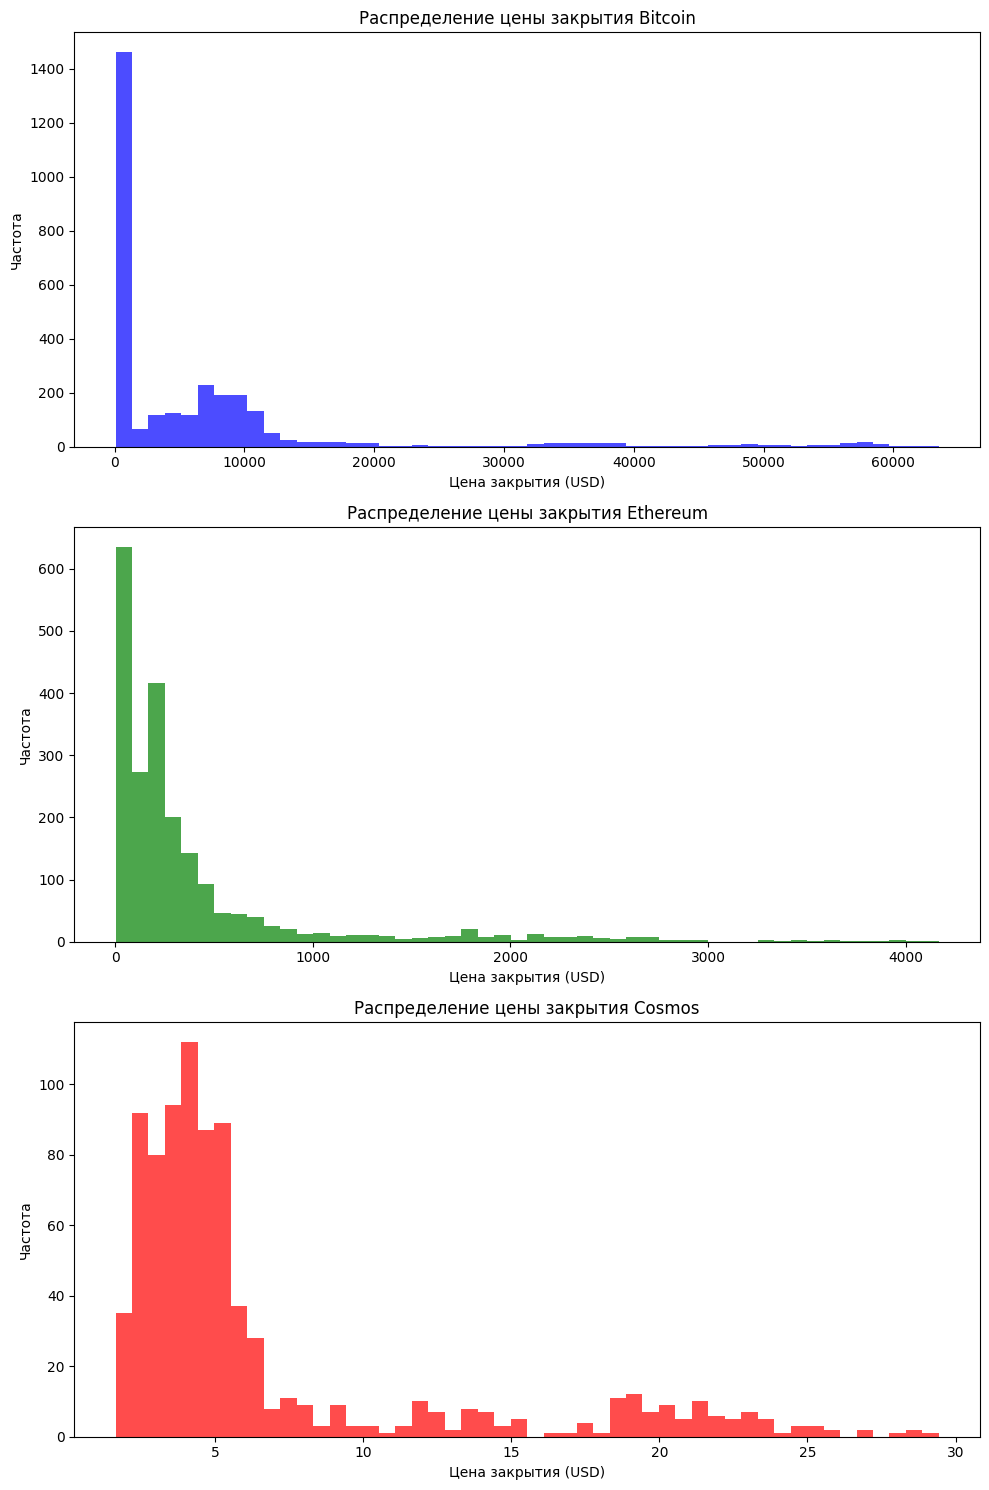

In [2]:
import matplotlib.pyplot as plt

# Создание фигуры с тремя подграфиками
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Гистограмма для Bitcoin
axes[0].hist(bitcoin_df['Close'], bins=50, color='blue', alpha=0.7)
axes[0].set_title('Распределение цены закрытия Bitcoin')
axes[0].set_xlabel('Цена закрытия (USD)')
axes[0].set_ylabel('Частота')

# Гистограмма для Ethereum
axes[1].hist(ethereum_df['Close'], bins=50, color='green', alpha=0.7)
axes[1].set_title('Распределение цены закрытия Ethereum')
axes[1].set_xlabel('Цена закрытия (USD)')
axes[1].set_ylabel('Частота')

# Гистограмма для Cosmos
axes[2].hist(cosmos_df['Close'], bins=50, color='red', alpha=0.7)
axes[2].set_title('Распределение цены закрытия Cosmos')
axes[2].set_xlabel('Цена закрытия (USD)')
axes[2].set_ylabel('Частота')

# Настройки графика
plt.tight_layout()
plt.show()


In [3]:
# Проверка на пропущенные значения
missing_values_bitcoin = bitcoin_df.isnull().sum()
missing_values_ethereum = ethereum_df.isnull().sum()
missing_values_cosmos = cosmos_df.isnull().sum()

print("Пропущенные значения в данных Bitcoin:\n", missing_values_bitcoin)
print("\nПропущенные значения в данных Ethereum:\n", missing_values_ethereum)
print("\nПропущенные значения в данных Cosmos:\n", missing_values_cosmos)


Пропущенные значения в данных Bitcoin:
 SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Пропущенные значения в данных Ethereum:
 SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Пропущенные значения в данных Cosmos:
 SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Инициализация скалера
scaler = MinMaxScaler()

# Применение скалера к основным столбцам
bitcoin_df[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']] = scaler.fit_transform(bitcoin_df[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']])
ethereum_df[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']] = scaler.fit_transform(ethereum_df[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']])
cosmos_df[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']] = scaler.fit_transform(cosmos_df[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']])


In [5]:
# Создание нового признака "Диапазон торгов за день"
bitcoin_df['Range'] = bitcoin_df['High'] - bitcoin_df['Low']
ethereum_df['Range'] = ethereum_df['High'] - ethereum_df['Low']
cosmos_df['Range'] = cosmos_df['High'] - cosmos_df['Low']

# Создание нового признака "Изменение цены за день"
bitcoin_df['Price_Change'] = bitcoin_df['Close'] - bitcoin_df['Open']
ethereum_df['Price_Change'] = ethereum_df['Close'] - ethereum_df['Open']
cosmos_df['Price_Change'] = cosmos_df['Close'] - cosmos_df['Open']

# Создание нового признака "Средняя цена за день"
bitcoin_df['Avg_Price'] = (bitcoin_df['High'] + bitcoin_df['Low'] + bitcoin_df['Open'] + bitcoin_df['Close']) / 4
ethereum_df['Avg_Price'] = (ethereum_df['High'] + ethereum_df['Low'] + ethereum_df['Open'] + ethereum_df['Close']) / 4
cosmos_df['Avg_Price'] = (cosmos_df['High'] + cosmos_df['Low'] + cosmos_df['Open'] + cosmos_df['Close']) / 4

# Просмотр первых нескольких строк после добавления новых признаков
print(bitcoin_df.head())
print(ethereum_df.head())
print(cosmos_df.head())


   SNo     Name Symbol                 Date      High       Low      Open  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  0.001126  0.001102  0.001039   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  0.001117  0.001103  0.001190   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  0.001008  0.000679  0.001111   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  0.000788  0.000431  0.000754   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  0.000518  0.000218  0.000595   

      Close  Volume  Marketcap     Range  Price_Change  Avg_Price  
0  0.001200     0.0   0.000696  0.000024      0.000161   0.001117  
1  0.001112     0.0   0.000645  0.000014     -0.000077   0.001130  
2  0.000765     0.0   0.000439  0.000329     -0.000345   0.000891  
3  0.000580     0.0   0.000329  0.000357     -0.000175   0.000638  
4  0.000462     0.0   0.000259  0.000300     -0.000133   0.000448  
   SNo      Name Symbol                 Date      High       Low      Open  \
0    1  Ethereum    ETH  2015-08-08 23:59:59  0.000

In [6]:
from sklearn.model_selection import train_test_split

# Выделение признаков (features) и целевой переменной (target)
X = bitcoin_df[['Range', 'Price_Change', 'Avg_Price']]  # Это ваши признаки
y = bitcoin_df['Close']  # Это целевая переменная, которую мы будем предсказывать

# Разделение данных на тренировочный (80%) и тестовый (20%) наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверка размеров данных
print(f"Размеры тренировочного набора: {X_train.shape}, {y_train.shape}")
print(f"Размеры тестового набора: {X_test.shape}, {y_test.shape}")


Размеры тренировочного набора: (2392, 3), (2392,)
Размеры тестового набора: (599, 3), (599,)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Инициализация модели линейной регрессии
model = LinearRegression()

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)

# Вывод метрик
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R^2 Score: {r2}")
print(f"Adjusted R^2 Score: {adjusted_r2}")


Mean Squared Error (MSE): 7.784438964976593e-07
Root Mean Squared Error (RMSE): 0.000882294676679883
Mean Absolute Error (MAE): 0.00030736815175747576
Mean Absolute Percentage Error (MAPE): inf%
R^2 Score: 0.9999680441882053
Adjusted R^2 Score: 0.9999678830664651


In [8]:
# Фильтрация строки с нулевым значением цены закрытия
anomaly_zero_close = bitcoin_df[bitcoin_df['Close'] == 0]

# Просмотр даты и символа криптовалюты
print(anomaly_zero_close[['Date', 'Symbol', 'Close']])


                   Date Symbol  Close
67  2013-07-05 23:59:59    BTC    0.0


In [9]:
# Найдем среднее значение цены закрытия для соседних дней
mean_close = (bitcoin_df.loc[66, 'Close'] + bitcoin_df.loc[68, 'Close']) / 2

# Заменим нулевое значение на среднее
bitcoin_df.loc[67, 'Close'] = mean_close

# Проверим результат
print(bitcoin_df.loc[67, 'Close'])


0.00010988488339026977


In [10]:
# Определение функции calculate_mape
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Пересчет MAPE после замены нулевого значения
y_pred_updated = model.predict(X_test)
mape_updated = calculate_mape(y_test, y_pred_updated)
print(f"MAPE после замены нулевого значения: {mape_updated}%")


MAPE после замены нулевого значения: inf%


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Инициализация модели линейной регрессии
model = LinearRegression()

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)

# Вывод метрик
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")
print(f"Adjusted R^2 Score: {adjusted_r2}")

Mean Squared Error (MSE): 7.784438964976593e-07
Root Mean Squared Error (RMSE): 0.000882294676679883
Mean Absolute Error (MAE): 0.00030736815175747576
R^2 Score: 0.9999680441882053
Adjusted R^2 Score: 0.9999678830664651


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Инициализация модели
model = DecisionTreeRegressor(random_state=42)

# 2. Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# 3. Предсказание на тестовых данных
y_pred = model.predict(X_test)

# 4. Расчет метрик
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 5. Вывод метрик
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 8.48690693077197e-06
Root Mean Squared Error (RMSE): 0.002913229639210059
Mean Absolute Error (MAE): 0.0010705579688344961
R^2 Score: 0.9996516049495422


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Инициализация модели
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# 3. Предсказание на тестовых данных
y_pred = model.predict(X_test)

# 4. Расчет метрик
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 5. Вывод метрик
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 4.061640762835172e-06
Root Mean Squared Error (RMSE): 0.0020153512752954933
Mean Absolute Error (MAE): 0.0007681430225275692
R^2 Score: 0.99983326604733


In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Инициализация модели
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# 2. Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# 3. Предсказание на тестовых данных
y_pred = model.predict(X_test)

# 4. Расчет метрик
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 5. Вывод метрик
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 4.52085842823851e-06
Root Mean Squared Error (RMSE): 0.0021262310383019316
Mean Absolute Error (MAE): 0.0010276503980402088
R^2 Score: 0.9998144147552145


In [17]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Инициализация модели SVM с RBF ядром
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Обучение модели на тренировочных данных
svm_model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred_svm = svm_model.predict(X_test)

# Расчет метрик
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Вывод метрик
print(f"Mean Squared Error (MSE): {mse_svm}")
print(f"Root Mean Squared Error (RMSE): {rmse_svm}")
print(f"Mean Absolute Error (MAE): {mae_svm}")
print(f"R^2 Score: {r2_svm}")


Mean Squared Error (MSE): 0.006210286481912979
Root Mean Squared Error (RMSE): 0.07880537089509178
Mean Absolute Error (MAE): 0.07605406345608641
R^2 Score: 0.7450622364693572


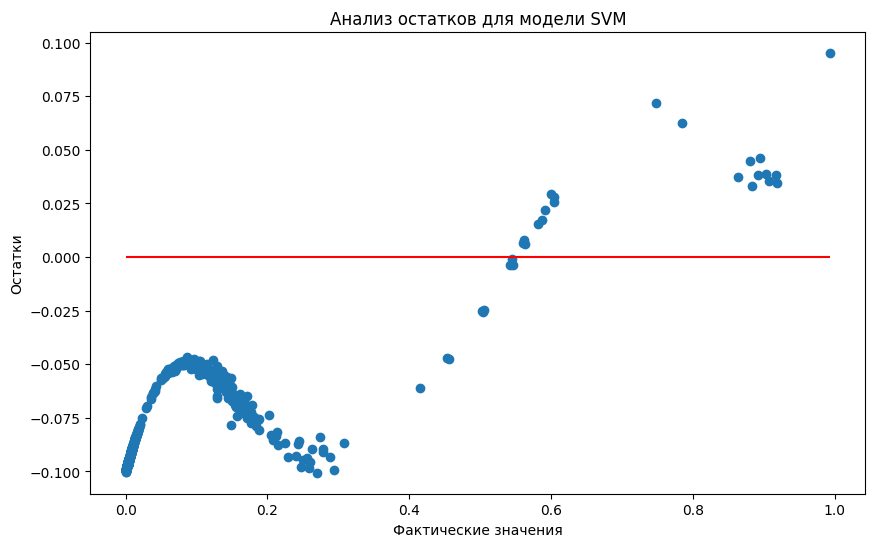

Найдено 304 аномалий:
[  2   4   5  10  12  15  16  18  19  20  22  24  27  28  30  31  35  36
  39  42  43  45  47  51  52  53  55  58  59  60  62  67  68  69  70  72
  73  76  78  79  84  86  88  92  93  95  96  97 101 103 104 105 107 108
 109 111 114 115 119 120 121 126 127 128 131 132 133 135 137 139 140 142
 143 145 146 147 148 149 150 151 153 154 156 157 158 162 165 166 168 170
 172 177 179 181 184 185 189 190 191 194 195 198 199 200 201 204 205 206
 209 212 215 221 225 227 228 232 233 234 235 236 237 240 241 246 247 249
 250 251 256 257 259 262 263 264 266 268 269 272 273 276 280 282 283 284
 285 286 287 288 289 290 292 294 296 300 302 305 307 310 316 317 318 319
 320 325 326 327 328 329 330 332 333 336 339 342 343 345 349 351 354 358
 359 360 362 364 367 368 369 375 376 378 380 382 388 389 390 393 394 395
 396 397 398 399 402 406 407 408 410 411 412 413 414 416 417 418 420 421
 422 424 426 427 428 429 432 436 438 439 440 441 442 443 444 445 446 447
 449 450 451 454 458 459 464 

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Расчет остатков
residuals = y_test - y_pred_svm

# Визуализация остатков
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='r')
plt.xlabel('Фактические значения')
plt.ylabel('Остатки')
plt.title('Анализ остатков для модели SVM')
plt.show()

# Выявление аномалий на основе остатков
threshold = 3 * np.std(residuals)  # Порог для аномалий
anomalies = np.where(np.abs(residuals) > threshold)[0]

print(f'Найдено {len(anomalies)} аномалий:')
print(anomalies)


In [20]:
import pandas as pd

# Создадим таблицу с результатами
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "SVM"],
    "MSE": [7.784438964976746e-07, 4.061640762835172e-06, 4.659326832571527e-06, 4.52085842823851e-06, 0.006210286481912979],
    "RMSE": [0.0008822946766798916, 0.0020153512752954933, 0.002158004329052433, 0.0021262310383019316, 0.07880537089509178],
    "MAE": [0.0003073681517574839, 0.0007681430225275692, 0.0008273917049658355, 0.0010276503980402088, 0.07605406345608641],
    "R^2": [0.9999680441882053, 0.99983326604733, 0.9997938654785383, 0.9998144147552145, 0.7450622364693572]
}

results_df = pd.DataFrame(results)

# Вывод таблицы
print(results_df)


               Model           MSE      RMSE       MAE       R^2
0  Linear Regression  7.784439e-07  0.000882  0.000307  0.999968
1      Decision Tree  4.061641e-06  0.002015  0.000768  0.999833
2      Random Forest  4.659327e-06  0.002158  0.000827  0.999794
3  Gradient Boosting  4.520858e-06  0.002126  0.001028  0.999814
4                SVM  6.210286e-03  0.078805  0.076054  0.745062


In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# 1. Добавление полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 2. Регуляризация (поиск лучших параметров с помощью GridSearchCV)
# Ridge (L2 регуляризация)
ridge = Ridge()
params_ridge = {'alpha': [0.1, 1, 10, 100]}  # Гиперпараметры для поиска
ridge_cv = GridSearchCV(ridge, params_ridge, cv=5)
ridge_cv.fit(X_train_poly, y_train)

# Lasso (L1 регуляризация)
lasso = Lasso()
params_lasso = {'alpha': [0.1, 1, 10, 100]}  # Гиперпараметры для поиска
lasso_cv = GridSearchCV(lasso, params_lasso, cv=5)
lasso_cv.fit(X_train_poly, y_train)

# 3. Прогнозирование и оценка модели
ridge_pred = ridge_cv.predict(X_test_poly)
lasso_pred = lasso_cv.predict(X_test_poly)

# 4. Расчет метрик
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# Вывод результатов
print("Ridge Regression:")
print(f"Best alpha: {ridge_cv.best_params_['alpha']}")
print(f"Mean Squared Error (MSE): {ridge_mse}")
print(f"Root Mean Squared Error (RMSE): {ridge_rmse}")
print(f"Mean Absolute Error (MAE): {ridge_mae}")
print(f"R^2 Score: {ridge_r2}")

print("\nLasso Regression:")
print(f"Best alpha: {lasso_cv.best_params_['alpha']}")
print(f"Mean Squared Error (MSE): {lasso_mse}")
print(f"Root Mean Squared Error (RMSE): {lasso_rmse}")
print(f"Mean Absolute Error (MAE): {lasso_mae}")
print(f"R^2 Score: {lasso_r2}")


Ridge Regression:
Best alpha: 0.1
Mean Squared Error (MSE): 2.135817393977967e-06
Root Mean Squared Error (RMSE): 0.001461443599314721
Mean Absolute Error (MAE): 0.0008884266921079618
R^2 Score: 0.9999123228032529

Lasso Regression:
Best alpha: 0.1
Mean Squared Error (MSE): 0.024578405086380515
Root Mean Squared Error (RMSE): 0.15677501422860887
Mean Absolute Error (MAE): 0.09973837947917587
R^2 Score: -0.008965309752005712


In [22]:
import pandas as pd

# Сводим результаты всех моделей в таблицу
results = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "SVM"],
    "MSE": [7.784439e-07, ridge_mse, lasso_mse, 4.061641e-06, 4.659327e-06, 4.520858e-06, 6.210286e-03],
    "RMSE": [0.000882, ridge_rmse, lasso_rmse, 0.002015, 0.002158, 0.002126, 0.078805],
    "MAE": [0.000307, ridge_mae, lasso_mae, 0.000768, 0.000827, 0.001028, 0.076054],
    "R^2": [0.999968, ridge_r2, lasso_r2, 0.999833, 0.999794, 0.999814, 0.745062]
}

# Создаем DataFrame для удобного отображения
results_df = pd.DataFrame(results)

# Выводим результаты
print(results_df)


               Model           MSE      RMSE       MAE       R^2
0  Linear Regression  7.784439e-07  0.000882  0.000307  0.999968
1   Ridge Regression  2.135817e-06  0.001461  0.000888  0.999912
2   Lasso Regression  2.457841e-02  0.156775  0.099738 -0.008965
3      Decision Tree  4.061641e-06  0.002015  0.000768  0.999833
4      Random Forest  4.659327e-06  0.002158  0.000827  0.999794
5  Gradient Boosting  4.520858e-06  0.002126  0.001028  0.999814
6                SVM  6.210286e-03  0.078805  0.076054  0.745062


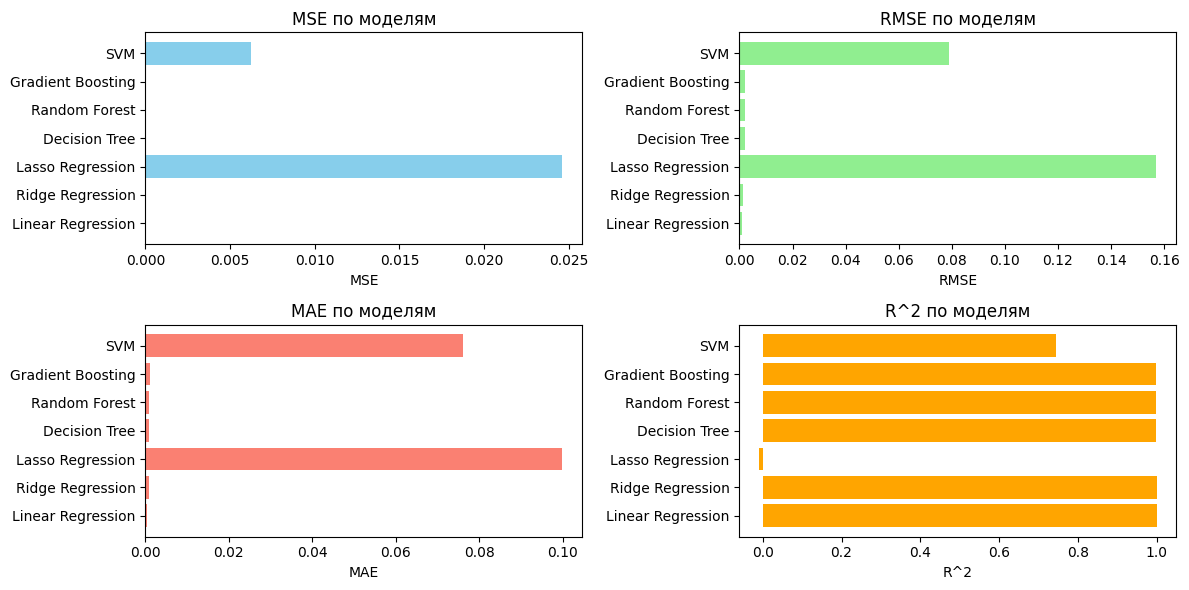

In [23]:
import matplotlib.pyplot as plt

# График ошибок для всех моделей
plt.figure(figsize=(12, 6))

# Подготовим данные
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM']
mse = [7.784439e-07, 2.135817e-06, 2.457841e-02, 4.061641e-06, 4.659327e-06, 4.520858e-06, 6.210286e-03]
rmse = [0.000882, 0.001461, 0.156775, 0.002015, 0.002158, 0.002126, 0.078805]
mae = [0.000307, 0.000888, 0.099738, 0.000768, 0.000827, 0.001028, 0.076054]
r2 = [0.999968, 0.999912, -0.008965, 0.999833, 0.999794, 0.999814, 0.745062]

# График для MSE
plt.subplot(2, 2, 1)
plt.barh(models, mse, color='skyblue')
plt.title('MSE по моделям')
plt.xlabel('MSE')

# График для RMSE
plt.subplot(2, 2, 2)
plt.barh(models, rmse, color='lightgreen')
plt.title('RMSE по моделям')
plt.xlabel('RMSE')

# График для MAE
plt.subplot(2, 2, 3)
plt.barh(models, mae, color='salmon')
plt.title('MAE по моделям')
plt.xlabel('MAE')

# График для R^2
plt.subplot(2, 2, 4)
plt.barh(models, r2, color='orange')
plt.title('R^2 по моделям')
plt.xlabel('R^2')

plt.tight_layout()
plt.show()


In [28]:
from sklearn.linear_model import LinearRegression

# Инициализация модели линейной регрессии
model = LinearRegression()

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)


LinearRegression()

In [29]:
# Получаем коэффициенты модели линейной регрессии
coefficients = model.coef_

# Создаем DataFrame для удобства анализа
features_importance = pd.DataFrame({
    'Feature': ['Range', 'Price Change', 'Avg Price'],  # Названия признаков
    'Coefficient': coefficients
})

# Сортируем признаки по абсолютному значению коэффициентов
features_importance['Abs Coefficient'] = features_importance['Coefficient'].abs()
features_importance = features_importance.sort_values(by='Abs Coefficient', ascending=False)

# Выводим важность признаков
print(features_importance)


        Feature  Coefficient  Abs Coefficient
2     Avg Price     1.000084         1.000084
1  Price Change     0.476961         0.476961
0         Range     0.063177         0.063177
